# Student Performance dataset

***import some important libraries***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***============================
(1). Load the Dataset
============================***

In [2]:
# 1. Load the dataset:
df4 = pd.read_csv(r"C:\Users\ASUS\Downloads\student_data.csv")

In [3]:
df4

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [5]:
# Look at first few rows to confirm columns
print(df4.head())
print(df4.info())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (to

***2. Identify Columns Types***

In [6]:
# Separate categorical and numeric columns.
# Many columns in this dataset are categorical encoded as strings. [web:6]
cat_cols = [
    "school", "sex", "address", "famsize", "Pstatus",
    "Mjob", "Fjob", "reason", "guardian",
    "schoolsup", "famsup", "paid", "activities",
    "nursery", "higher", "internet", "romantic"
]

num_cols = [
    "age", "traveltime", "studytime", "failures",
    "famrel", "freetime", "goout", "Dalc", "Walc",
    "health", "absences", "G1", "G2", "G3"
]

# Keep only columns that actually exist in your dataframe
cat_cols = [c for c in cat_cols if c in df4.columns]
num_cols = [c for c in num_cols if c in df4.columns]

***3. Univariate Plots***

***====================================
2. Univariate plots: one variable
====================================***

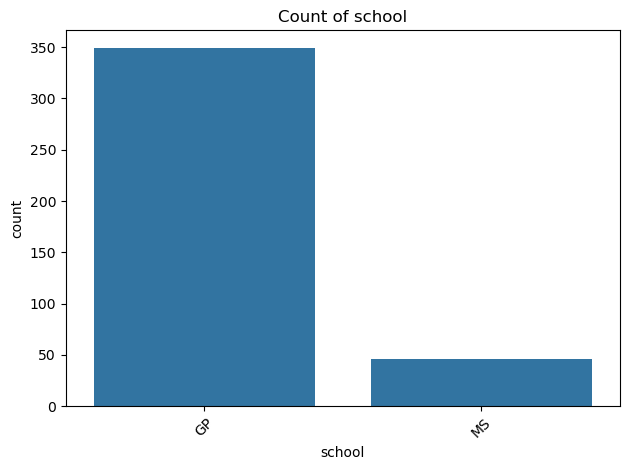

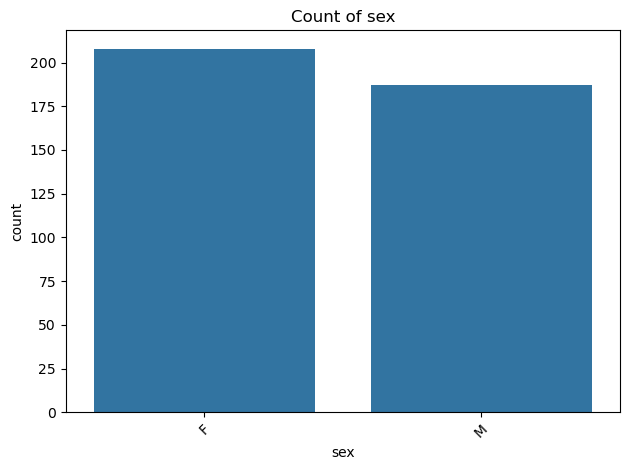

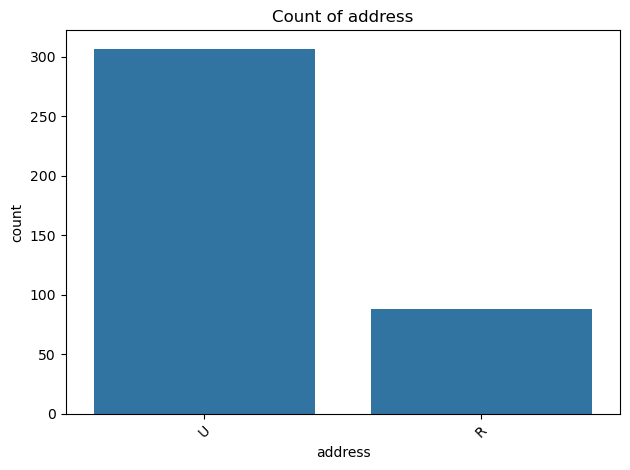

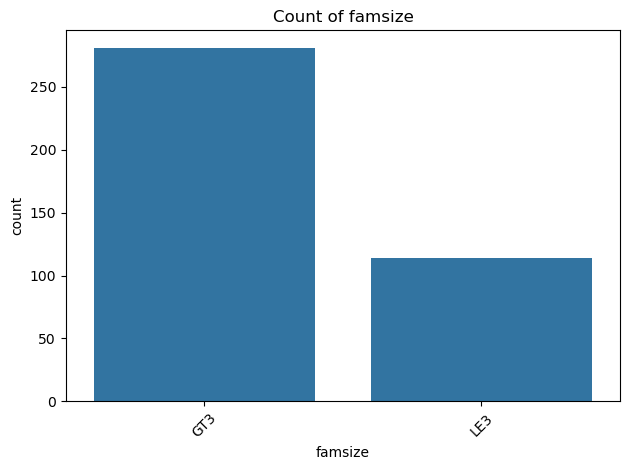

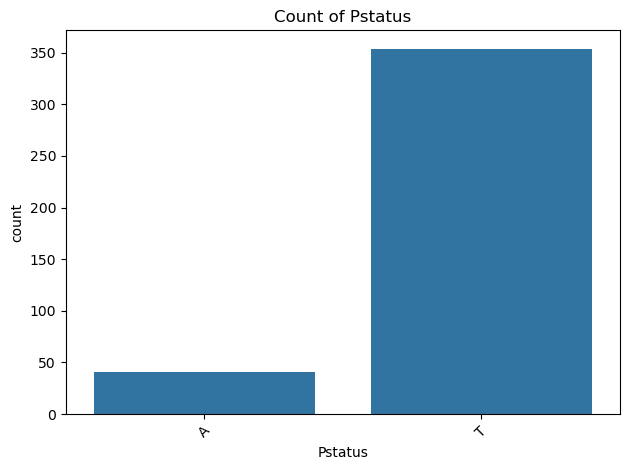

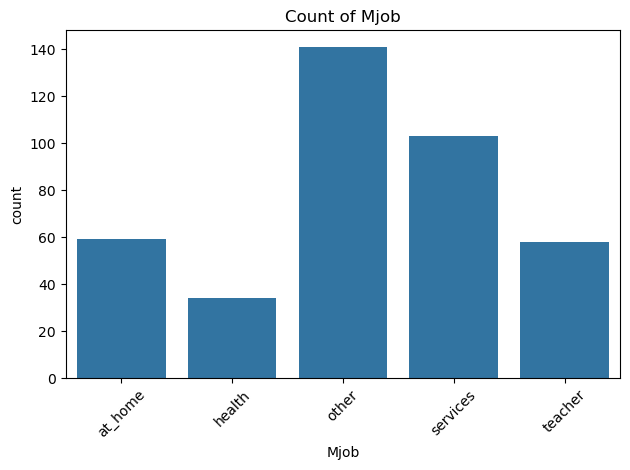

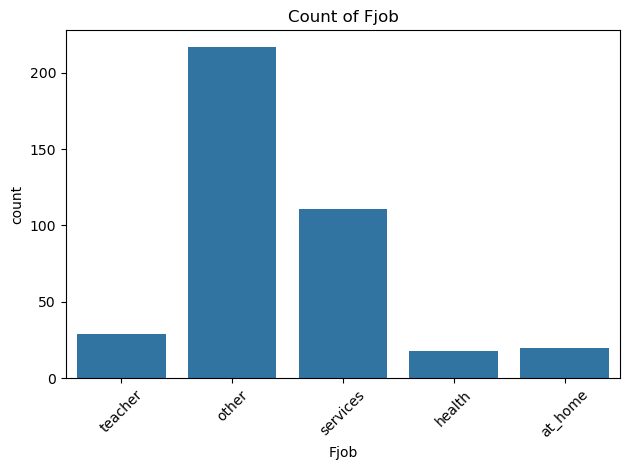

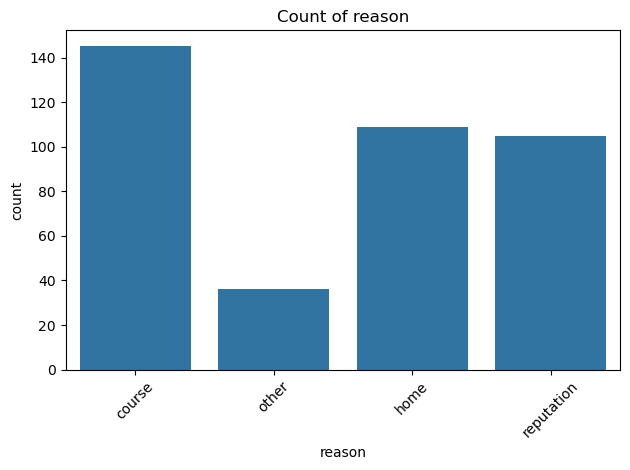

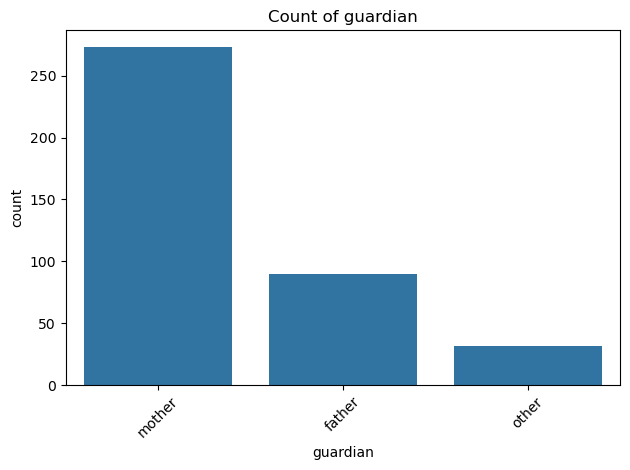

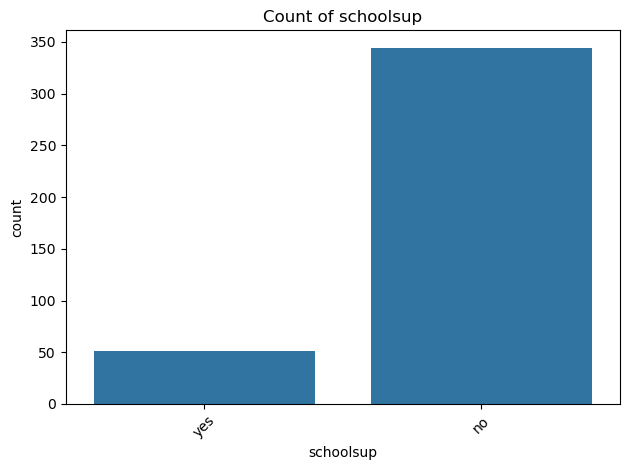

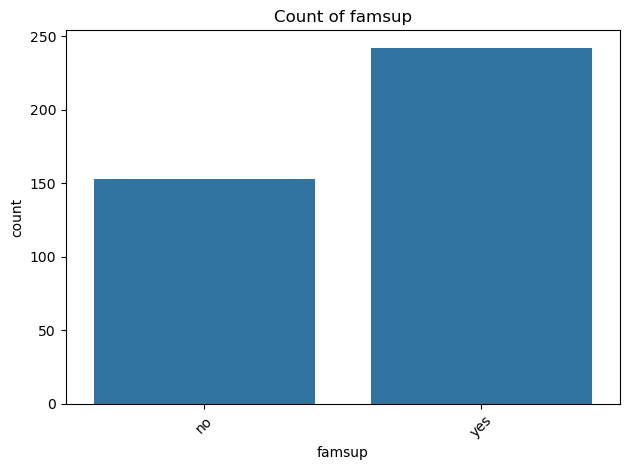

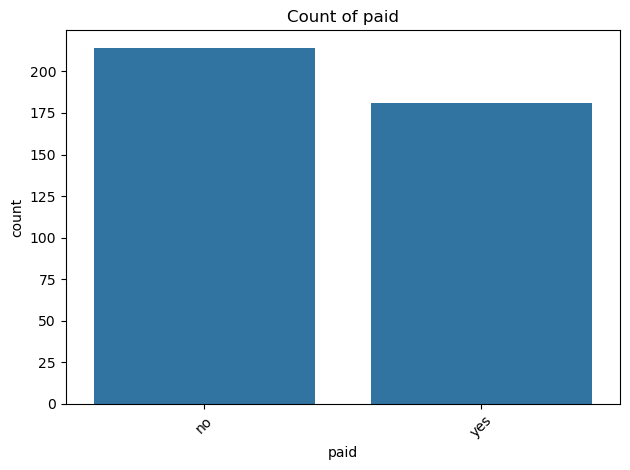

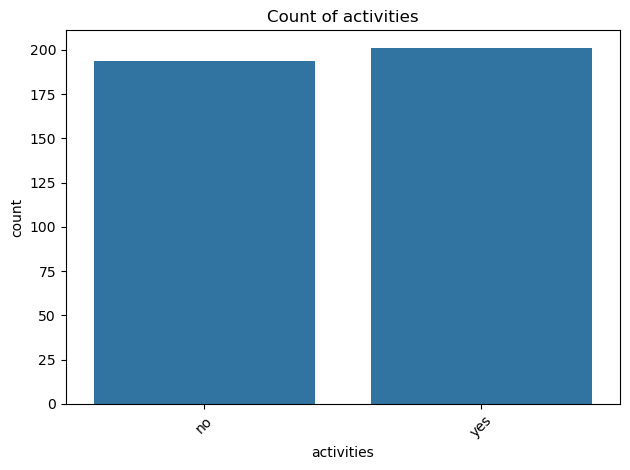

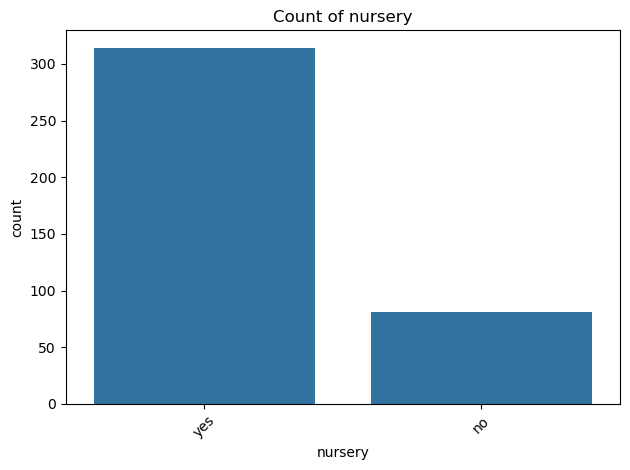

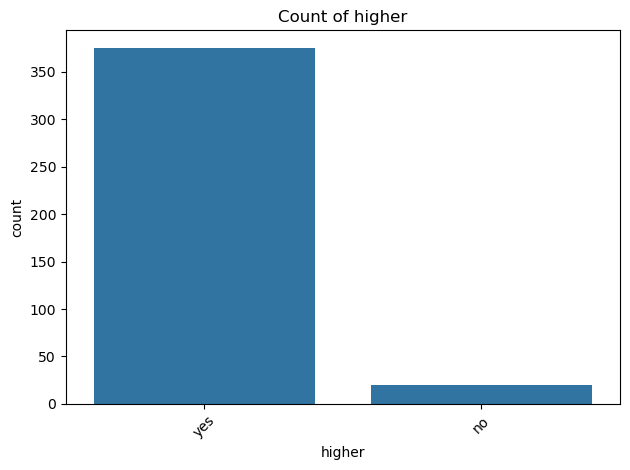

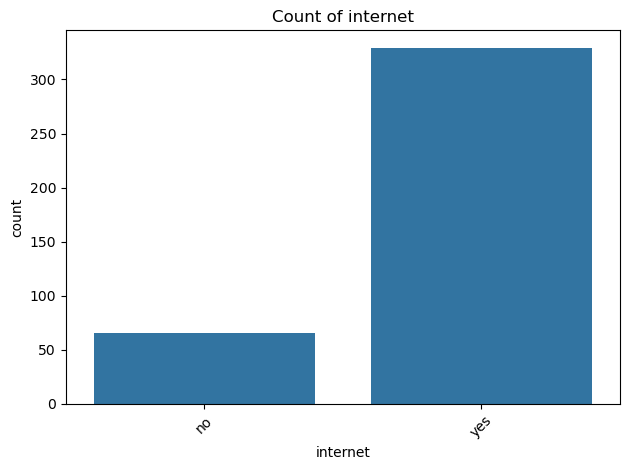

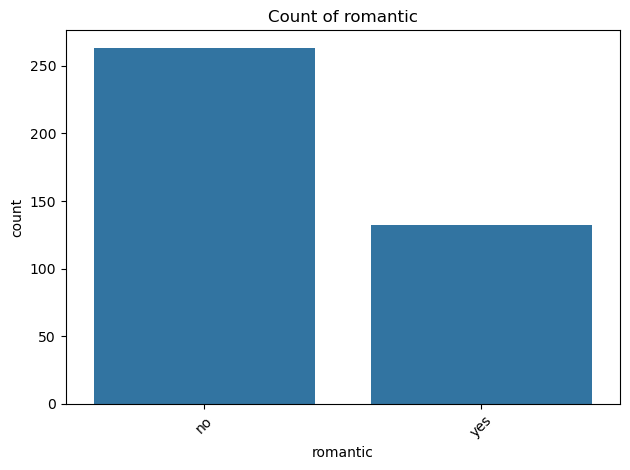

In [9]:
# 2.1 Bar plots for categorical columns
for col in cat_cols:
    plt.figure()
    # Countplot shows number of rows per category
    sns.countplot(data=df4, x=col)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

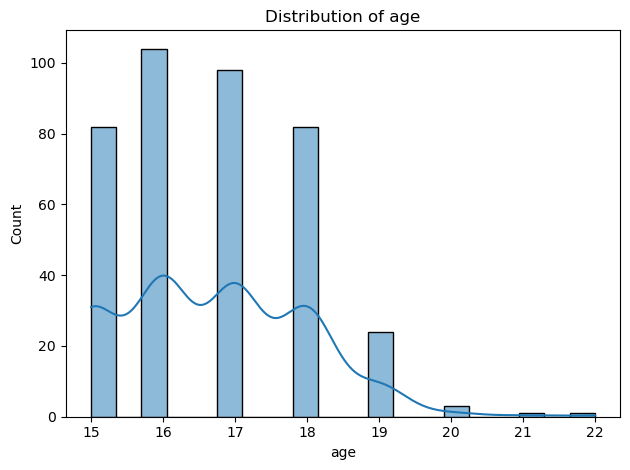

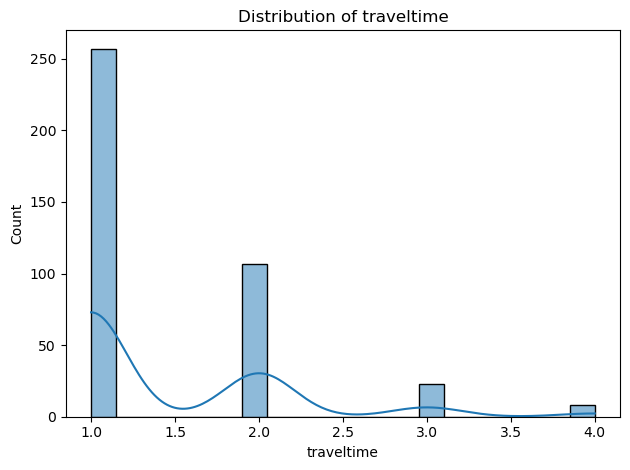

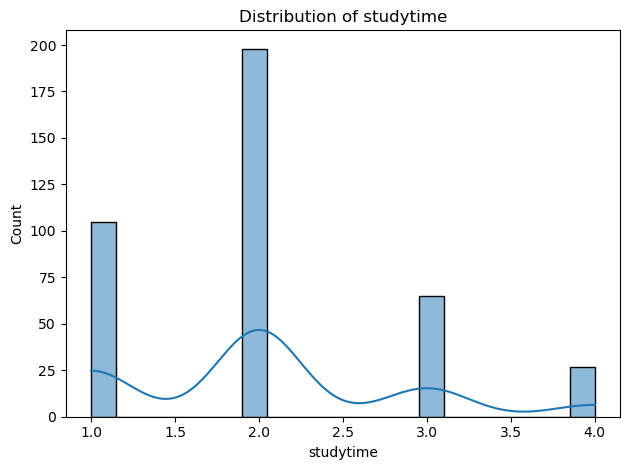

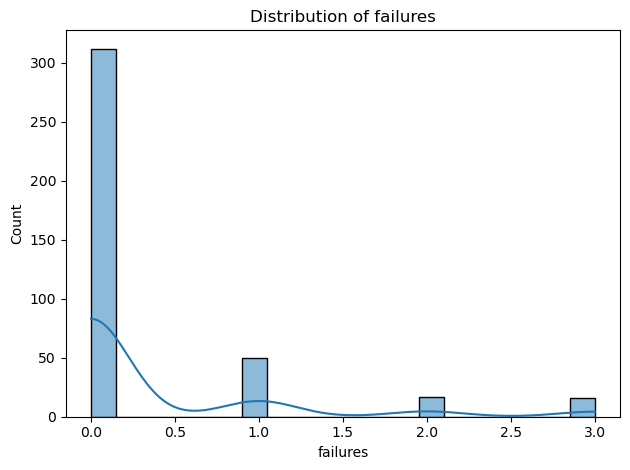

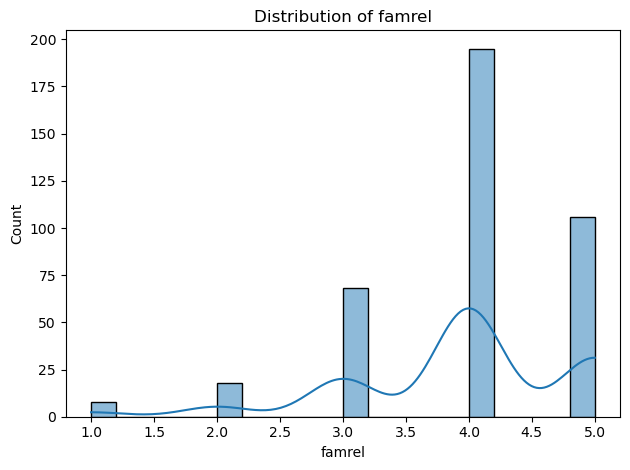

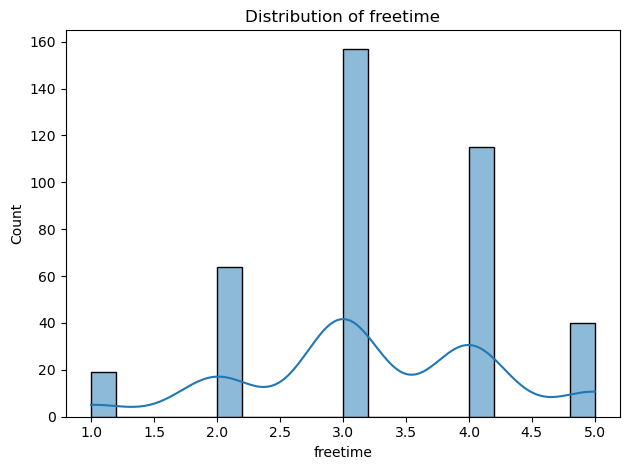

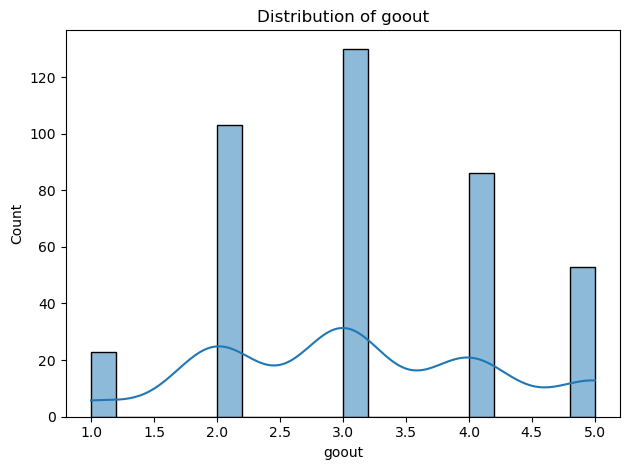

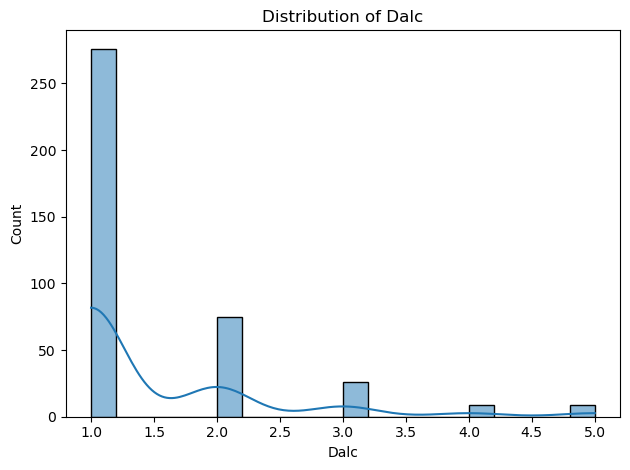

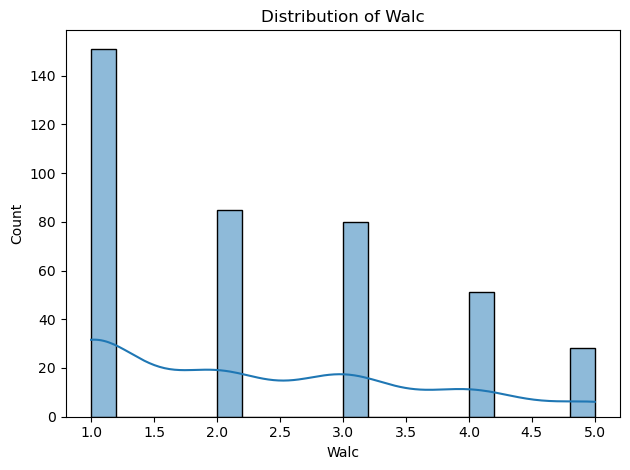

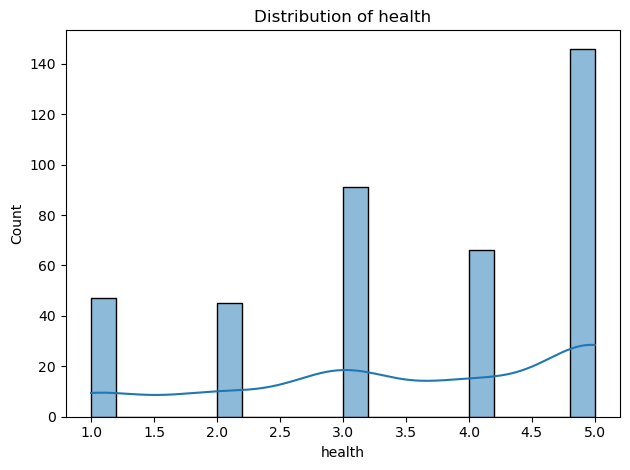

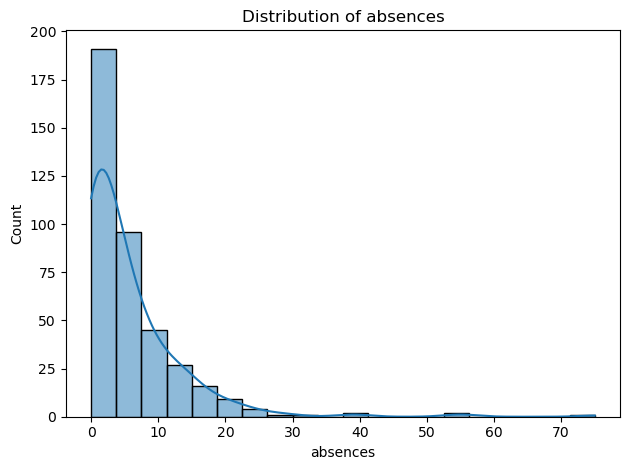

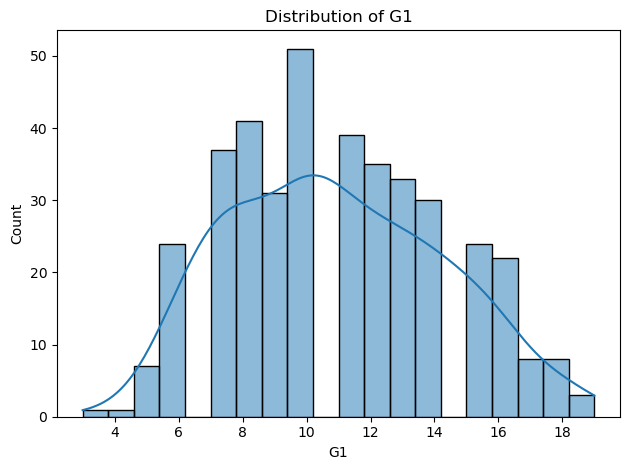

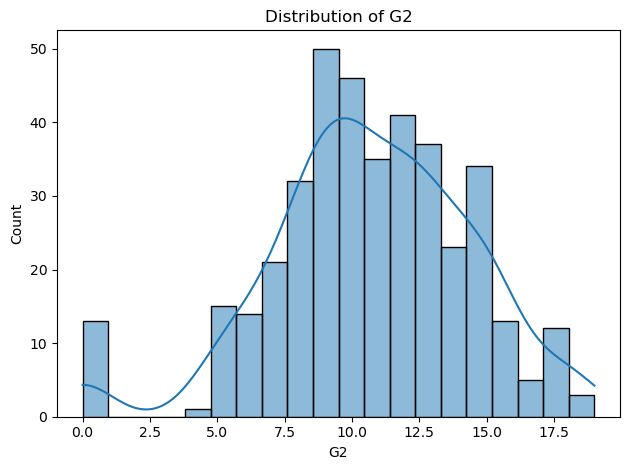

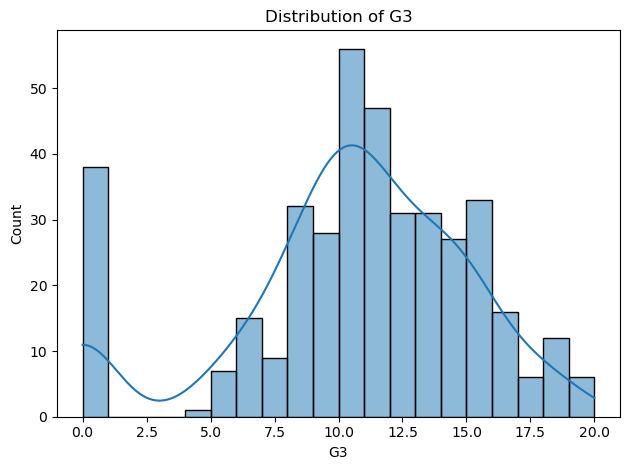

In [10]:
# 2.2 Histograms for numeric columns
for col in num_cols:
    plt.figure()
    # histplot with kde=True overlays a smooth density curve
    sns.histplot(data=df4, x=col, bins=20, kde=True)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

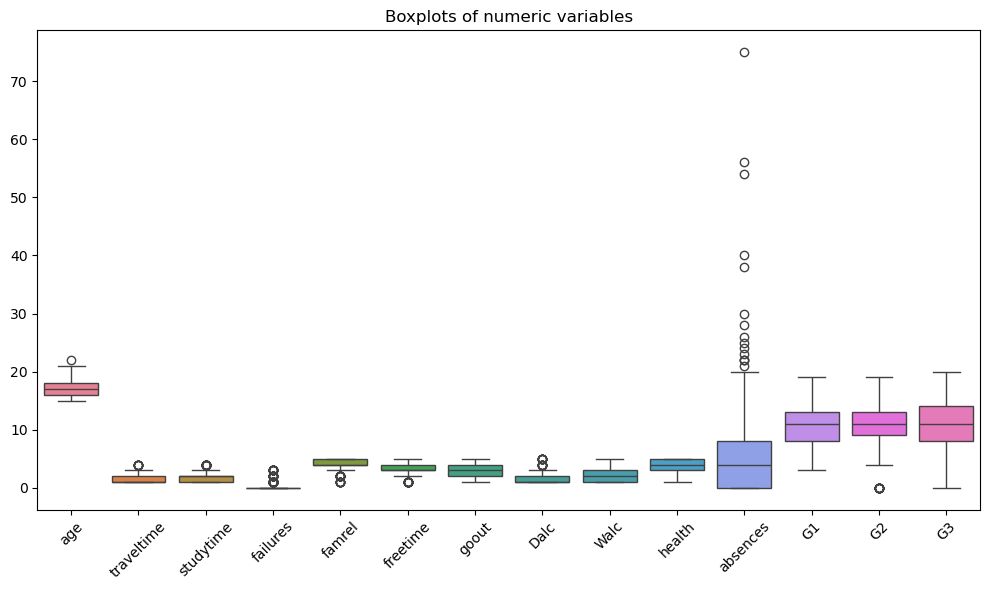

In [11]:
# 2.3 Boxplots for numeric columns (check spread & outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df4[num_cols])
plt.xticks(rotation=45)
plt.title("Boxplots of numeric variables")
plt.tight_layout()
plt.show()

***4. Grade‑focused plots (G3 as target)***

***====================================
3. Plots focused on final grade G3
====================================***

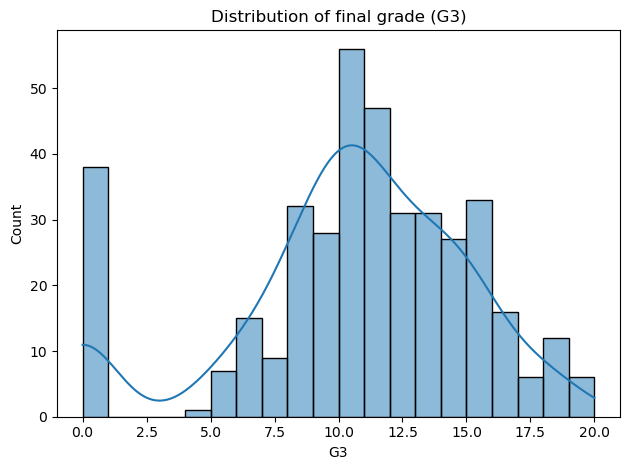

In [12]:
target = "G3"  # final grade (0–20 in UCI data)

# 3.1 Histogram of G3
plt.figure()
sns.histplot(data=df4, x=target, bins=20, kde=True)
plt.title("Distribution of final grade (G3)")
plt.tight_layout()
plt.show()

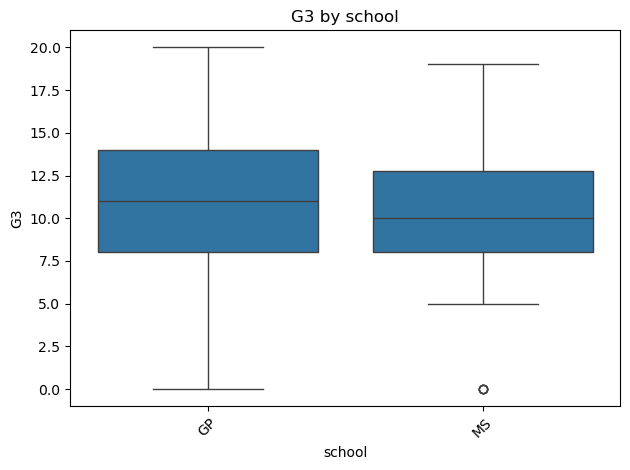

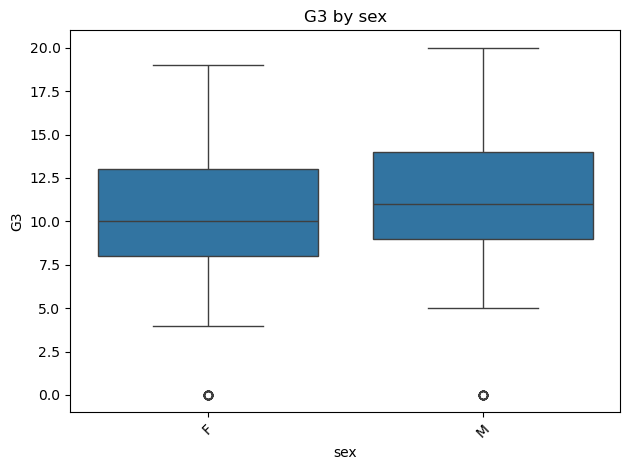

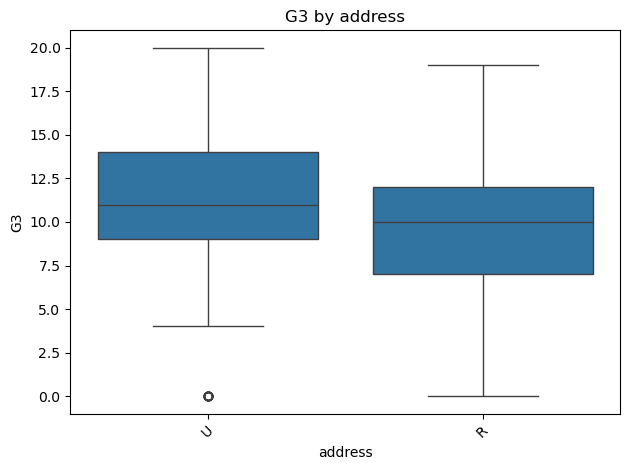

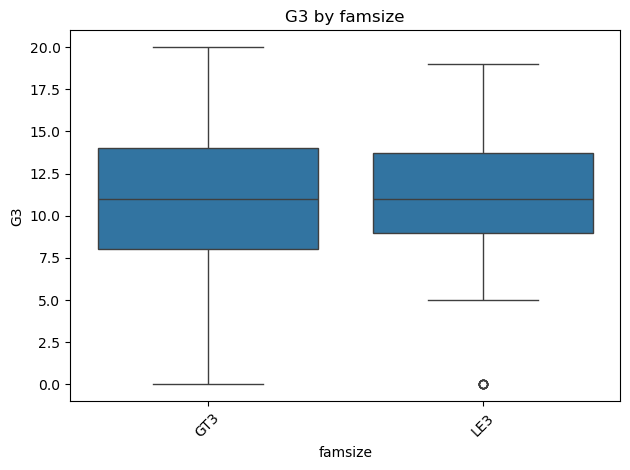

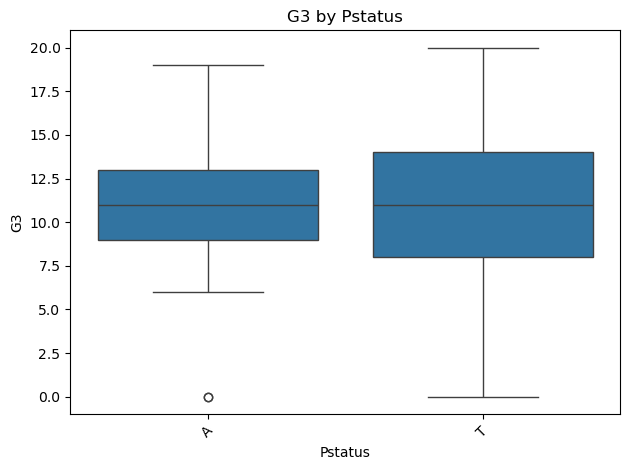

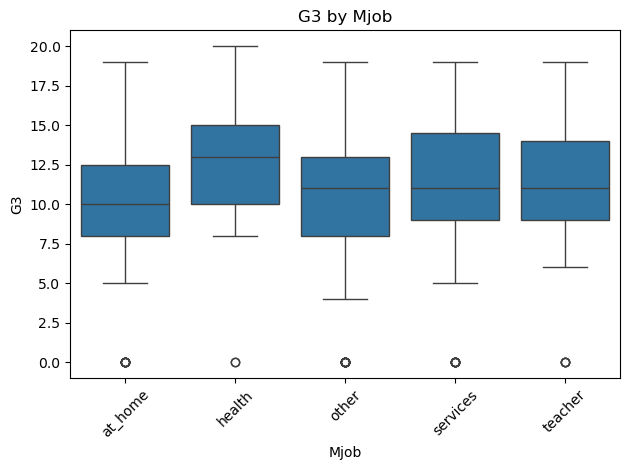

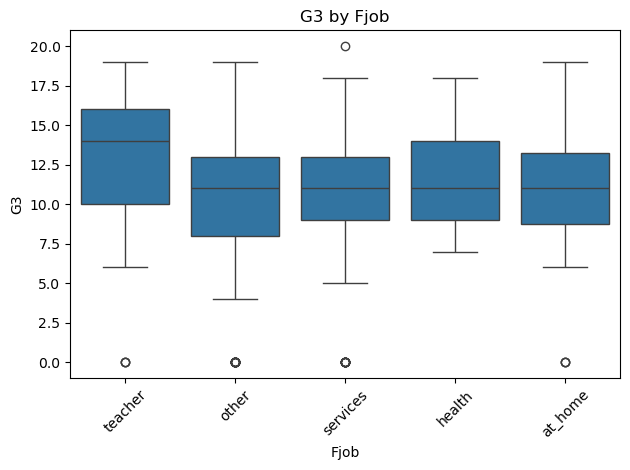

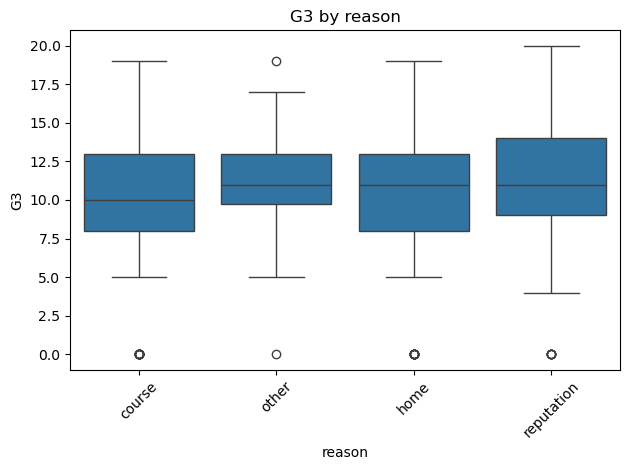

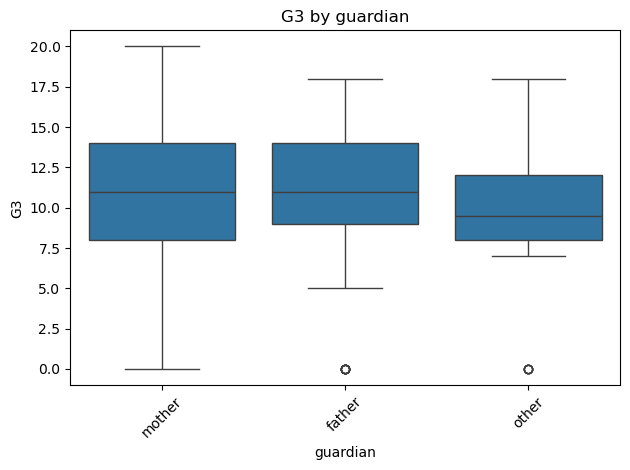

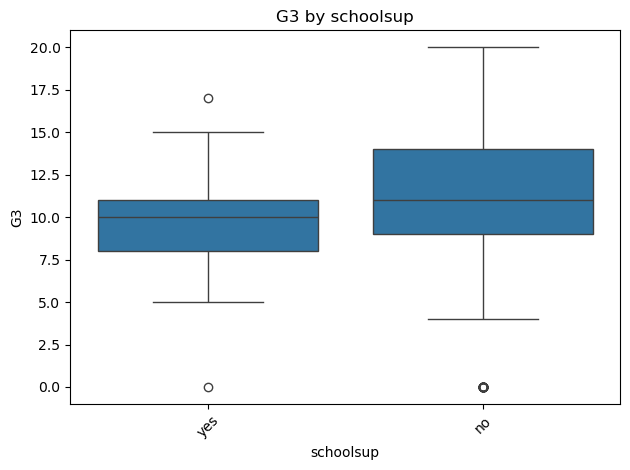

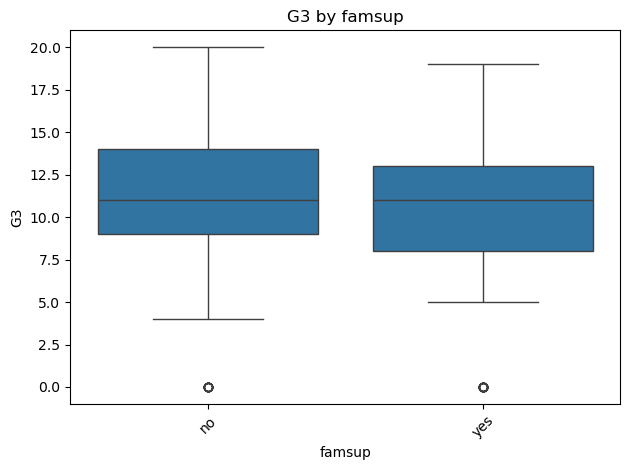

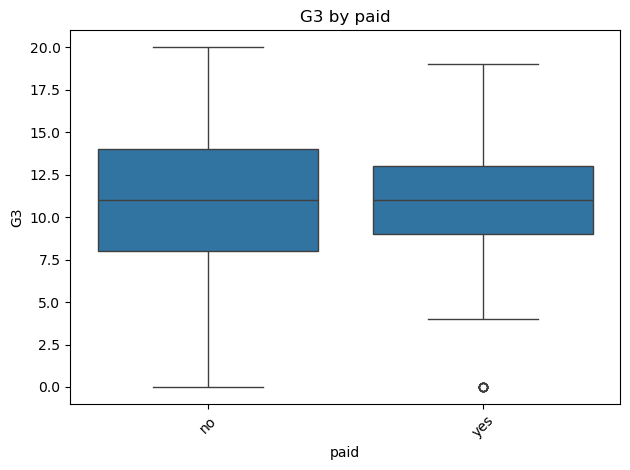

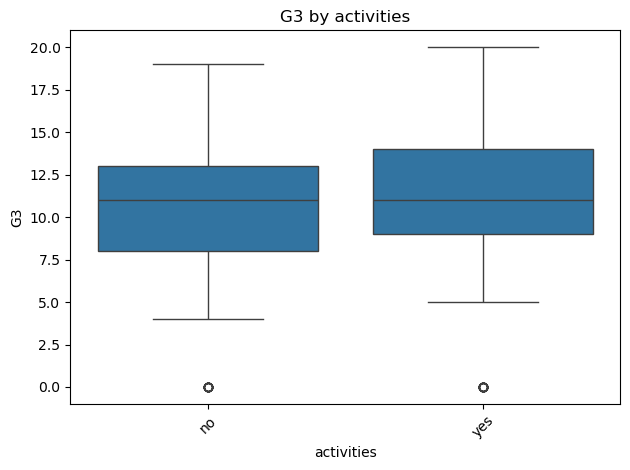

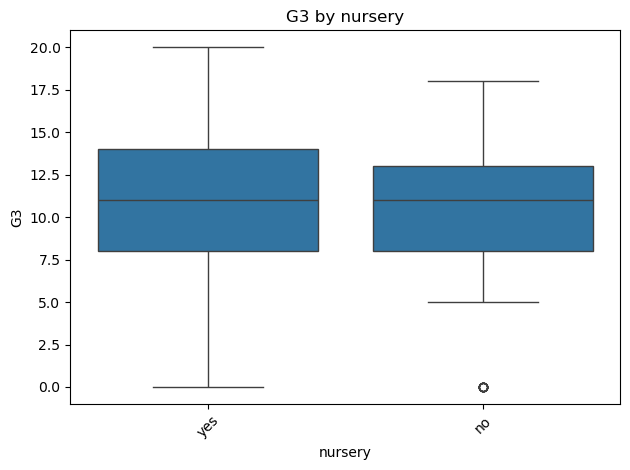

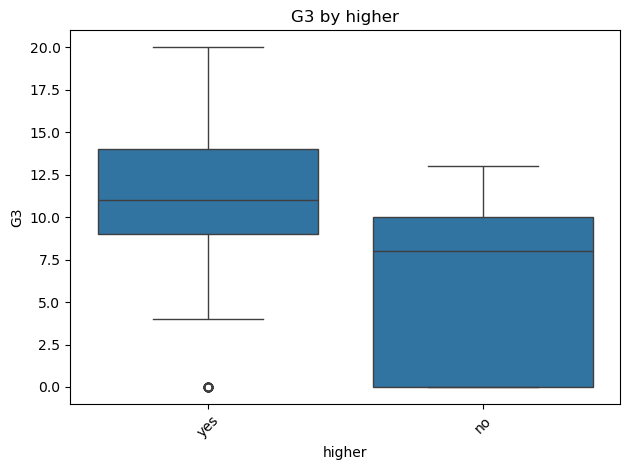

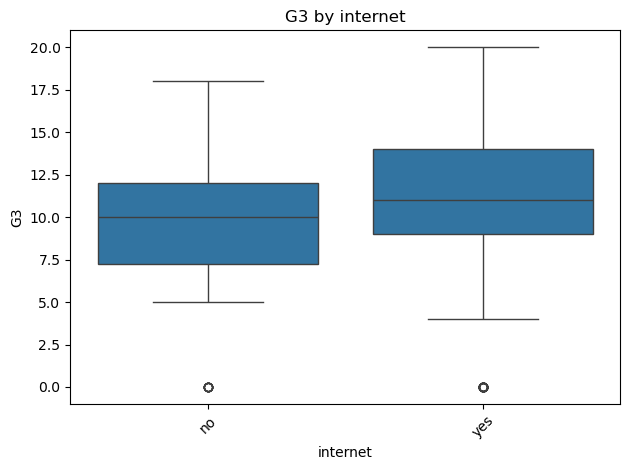

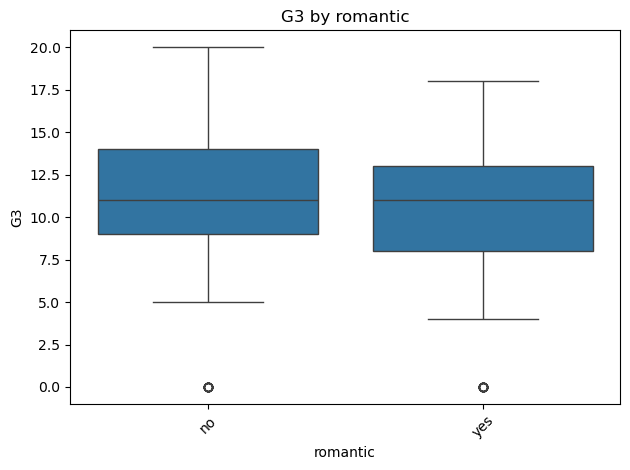

In [13]:
# 3.2 Boxplot of G3 vs each categorical variable
for col in cat_cols:
    plt.figure()
    sns.boxplot(data=df4, x=col, y=target)
    plt.title(f"{target} by {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

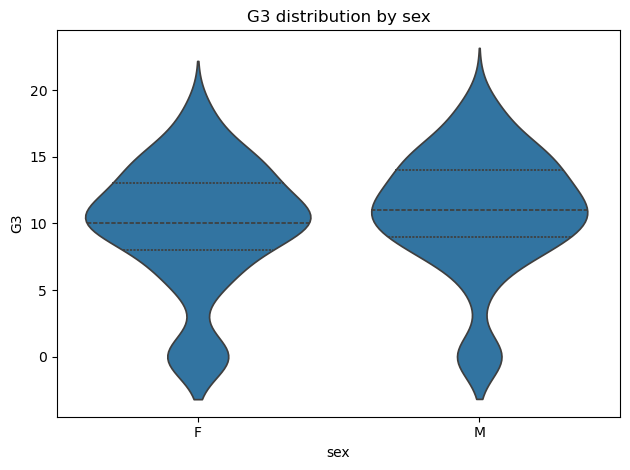

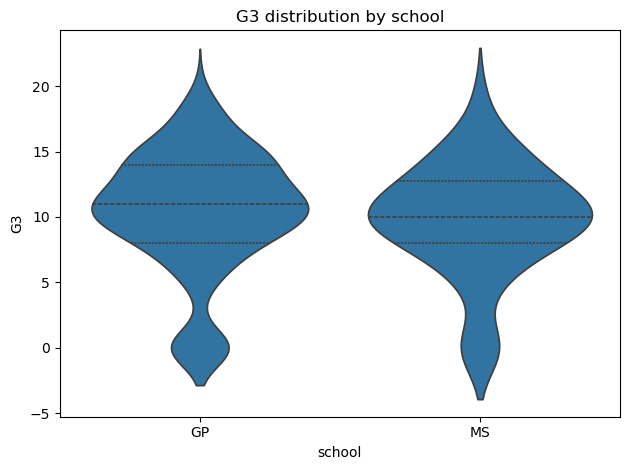

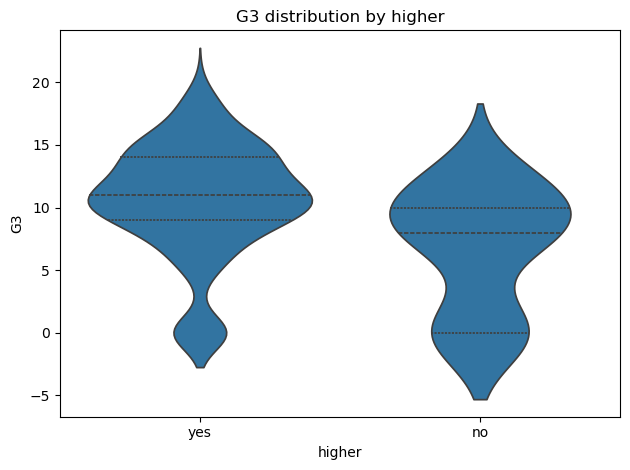

In [14]:
# 3.3 Violin plot of G3 vs a few key categorical variables
for col in ["sex", "school", "higher"]:
    if col not in df4.columns:
        continue
    plt.figure()
    # Violin plot shows full distribution shape
    sns.violinplot(data=df4, x=col, y=target, inner="quartile")
    plt.title(f"{target} distribution by {col}")
    plt.tight_layout()
    plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21356\1050966627.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df4, x=col, y=target, estimator="mean", ci="sd")


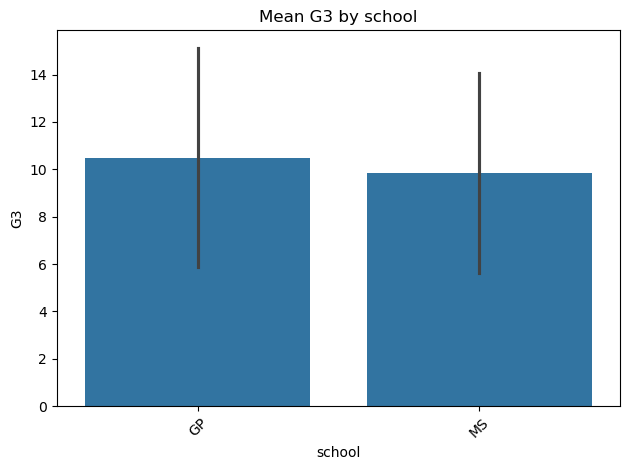

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21356\1050966627.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df4, x=col, y=target, estimator="mean", ci="sd")


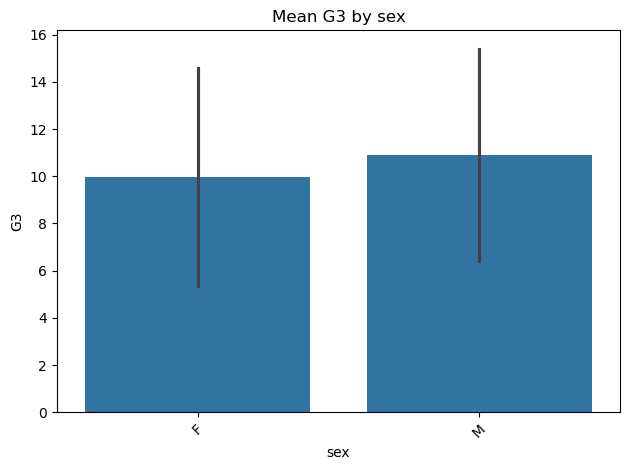

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21356\1050966627.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df4, x=col, y=target, estimator="mean", ci="sd")


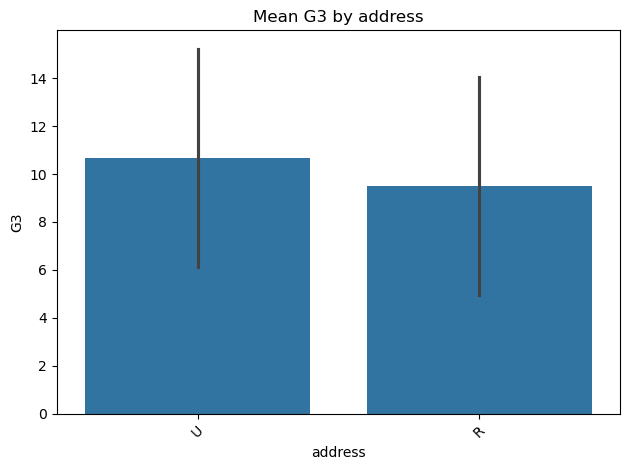

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21356\1050966627.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df4, x=col, y=target, estimator="mean", ci="sd")


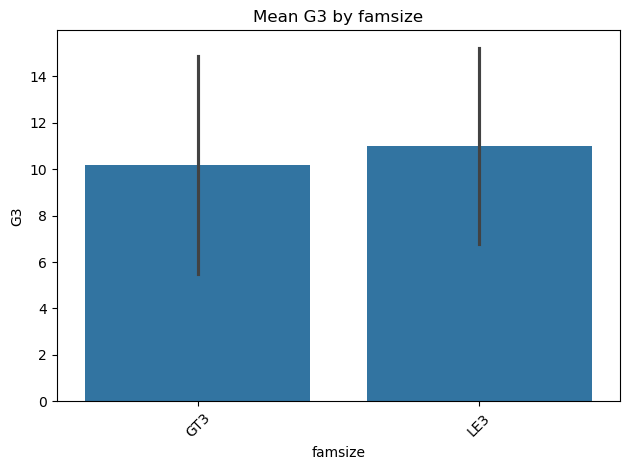

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21356\1050966627.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df4, x=col, y=target, estimator="mean", ci="sd")


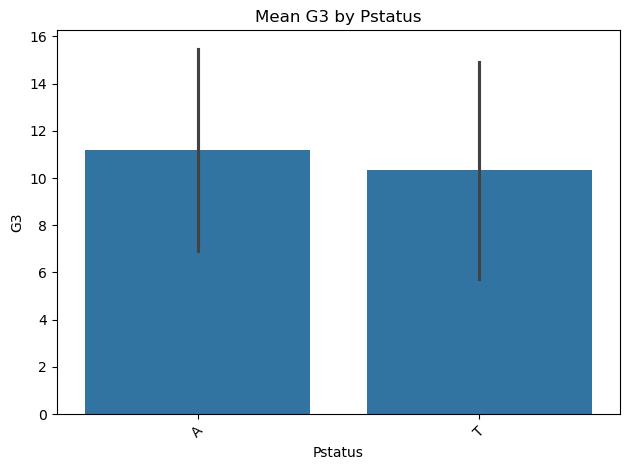

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21356\1050966627.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df4, x=col, y=target, estimator="mean", ci="sd")


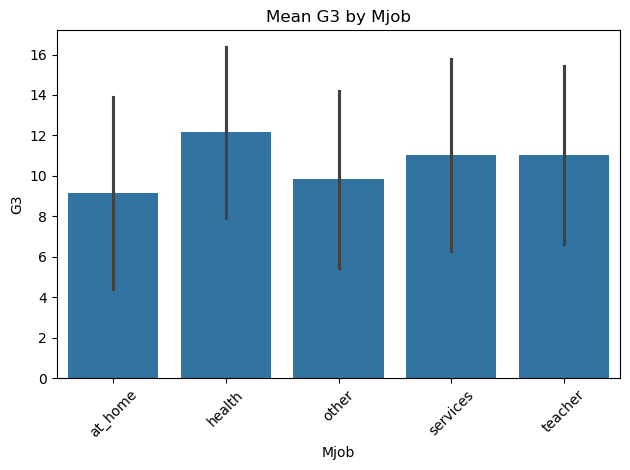

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21356\1050966627.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df4, x=col, y=target, estimator="mean", ci="sd")


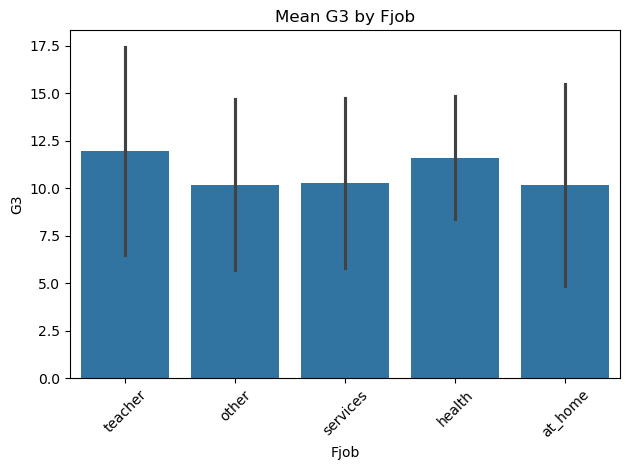

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21356\1050966627.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df4, x=col, y=target, estimator="mean", ci="sd")


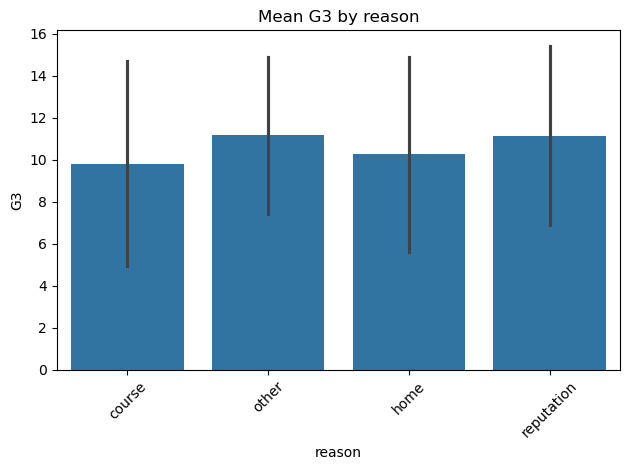

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21356\1050966627.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df4, x=col, y=target, estimator="mean", ci="sd")


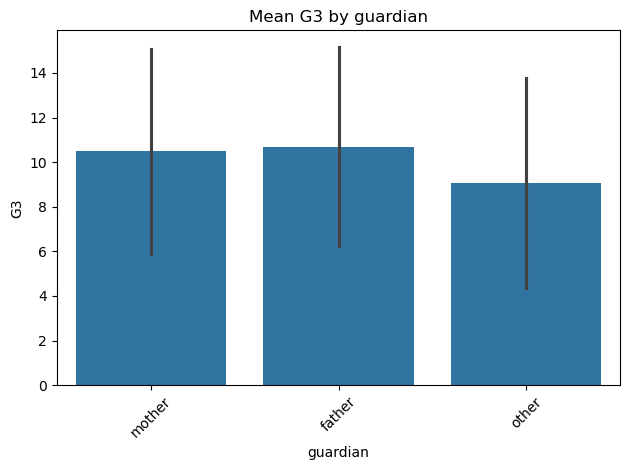

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21356\1050966627.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df4, x=col, y=target, estimator="mean", ci="sd")


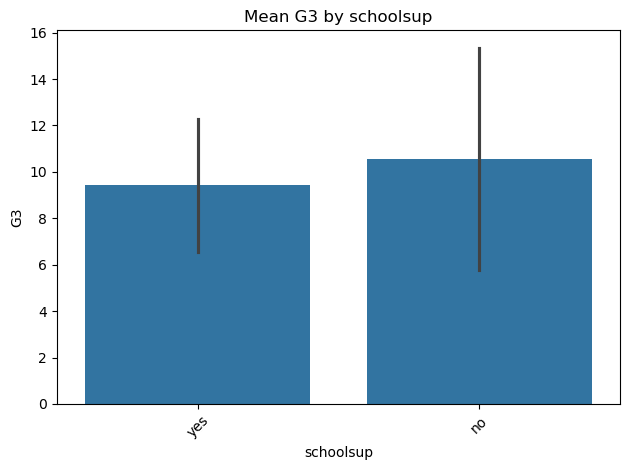

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21356\1050966627.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df4, x=col, y=target, estimator="mean", ci="sd")


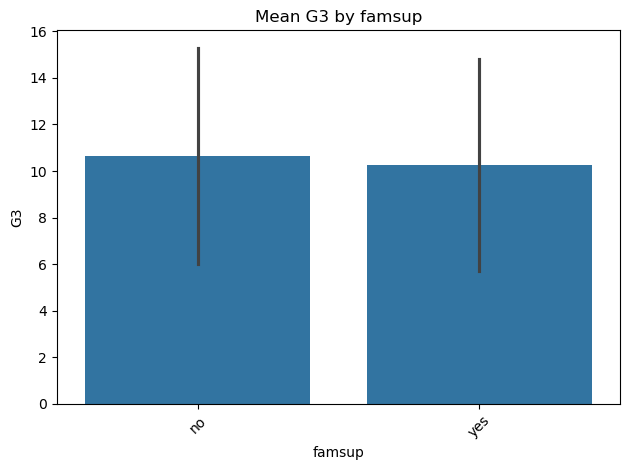

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21356\1050966627.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df4, x=col, y=target, estimator="mean", ci="sd")


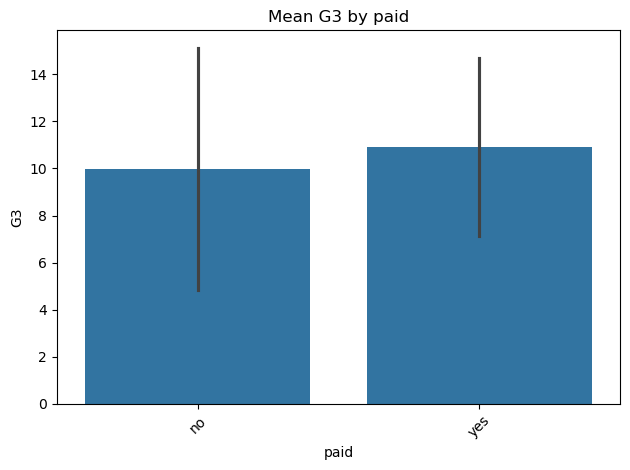

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21356\1050966627.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df4, x=col, y=target, estimator="mean", ci="sd")


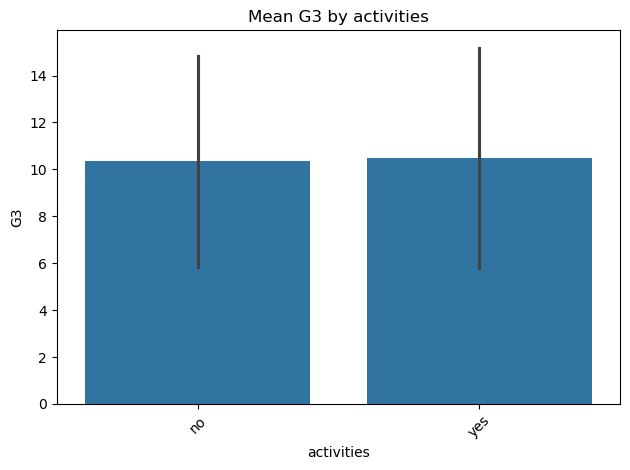

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21356\1050966627.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df4, x=col, y=target, estimator="mean", ci="sd")


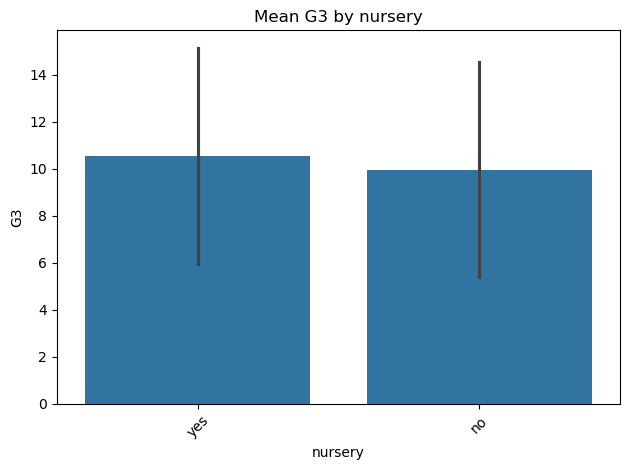

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21356\1050966627.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df4, x=col, y=target, estimator="mean", ci="sd")


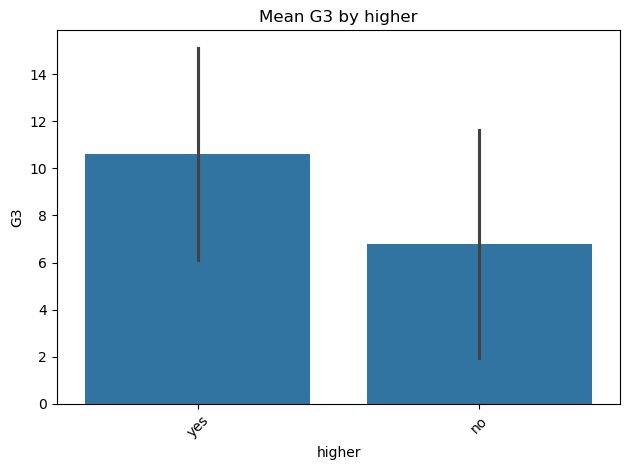

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21356\1050966627.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df4, x=col, y=target, estimator="mean", ci="sd")


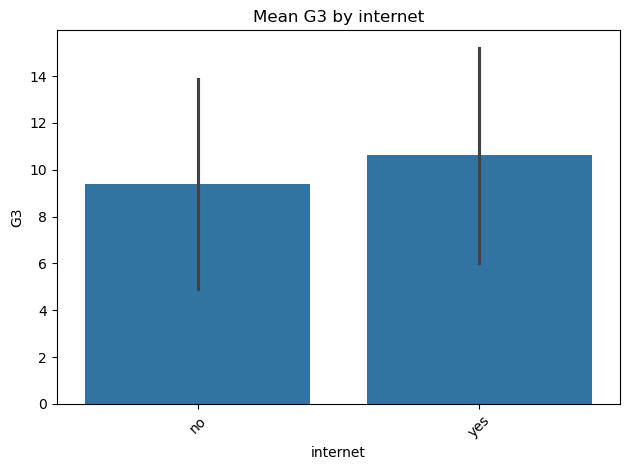

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21356\1050966627.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df4, x=col, y=target, estimator="mean", ci="sd")


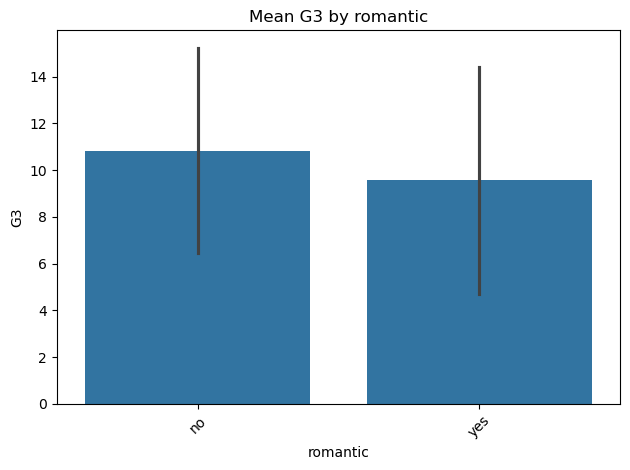

In [15]:
# 3.4 Mean G3 per category (bar plots)
for col in cat_cols:
    plt.figure()
    # barplot with estimator=mean shows mean G3 per category
    sns.barplot(data=df4, x=col, y=target, estimator="mean", ci="sd")
    plt.title(f"Mean {target} by {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

***5. Relationships between numeric variables***

***====================================
4. Numeric relationships
====================================***

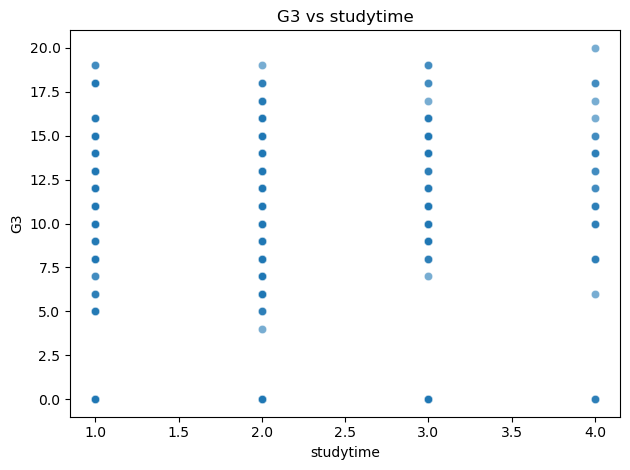

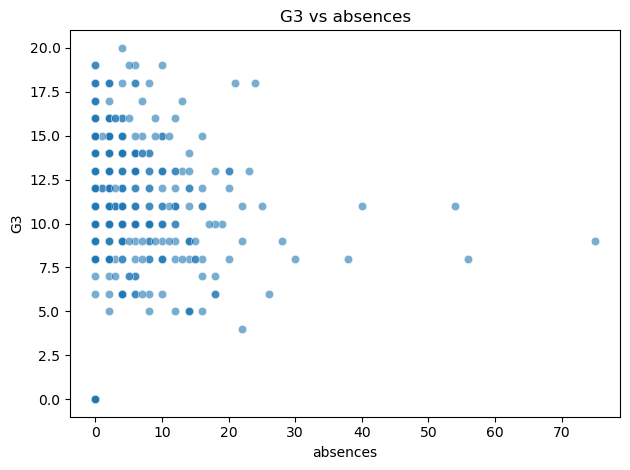

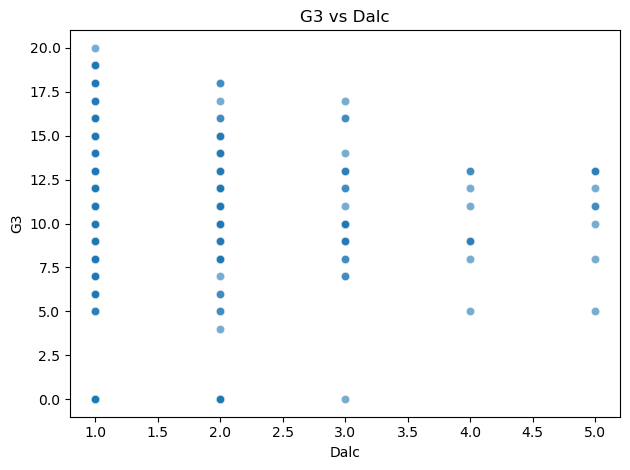

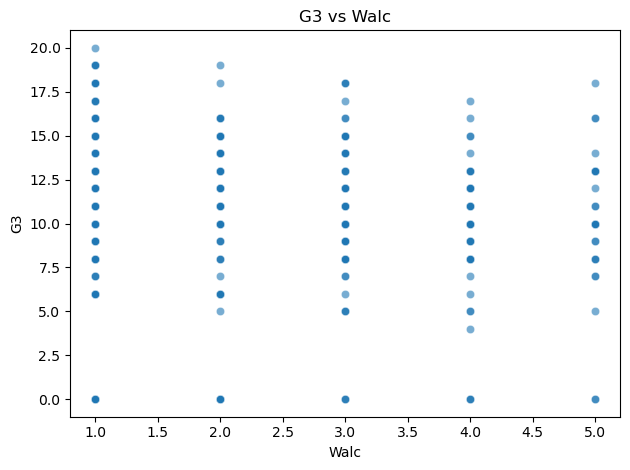

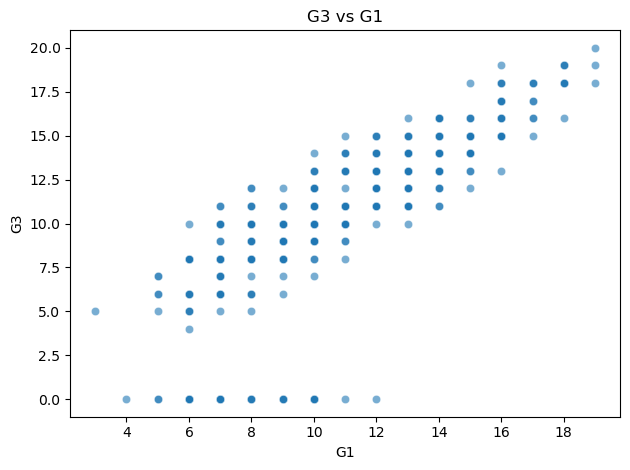

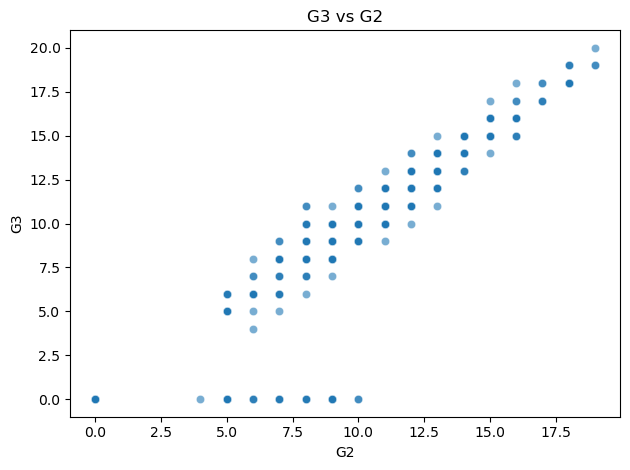

In [18]:
# 4.1 Scatter plots: selected pairs vs G3
scatter_pairs = [
    ("studytime", target),
    ("absences", target),
    ("Dalc", target),
    ("Walc", target),
    ("G1", target),
    ("G2", target),
]

for x_col, y_col in scatter_pairs:
    if x_col not in df4.columns or y_col not in df4.columns:
        continue
    plt.figure()
    sns.scatterplot(data=df4, x=x_col, y=y_col, alpha=0.6)
    plt.title(f"{y_col} vs {x_col}")
    plt.tight_layout()
    plt.show()

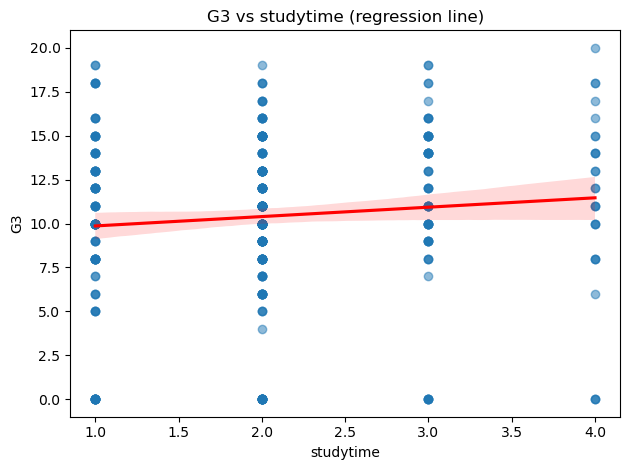

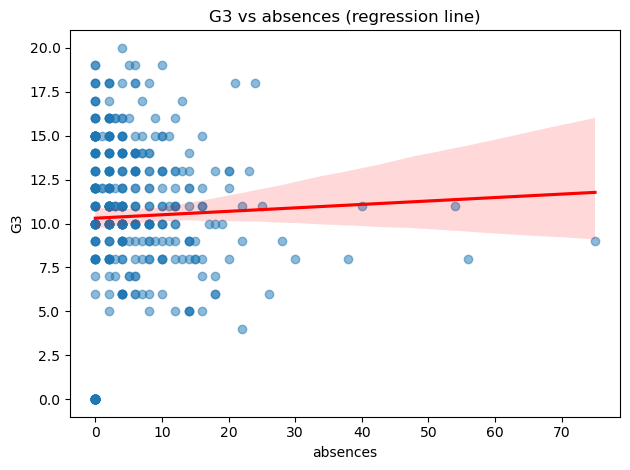

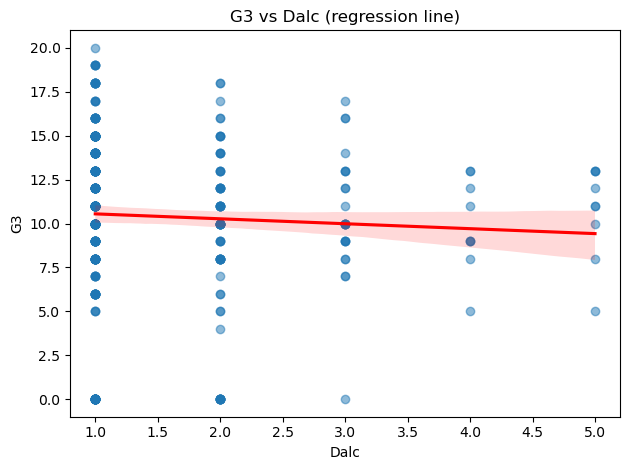

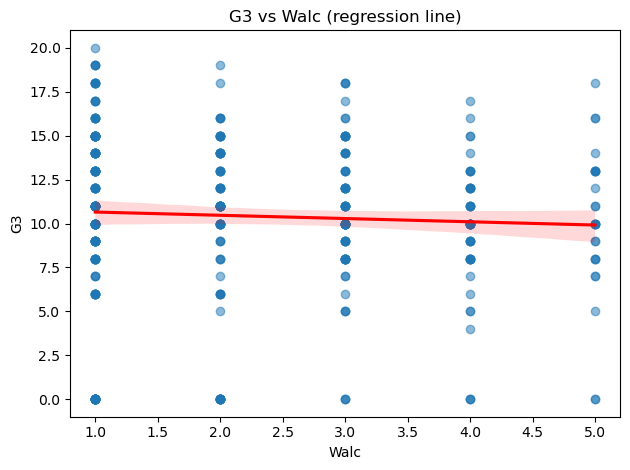

In [19]:
# 4.2 Regression plots with trend line
for x_col in ["studytime", "absences", "Dalc", "Walc"]:
    if x_col not in df4.columns:
        continue
    plt.figure()
    sns.regplot(data=df4, x=x_col, y=target,
                scatter_kws={"alpha": 0.5},
                line_kws={"color": "red"})
    plt.title(f"{target} vs {x_col} (regression line)")
    plt.tight_layout()
    plt.show()

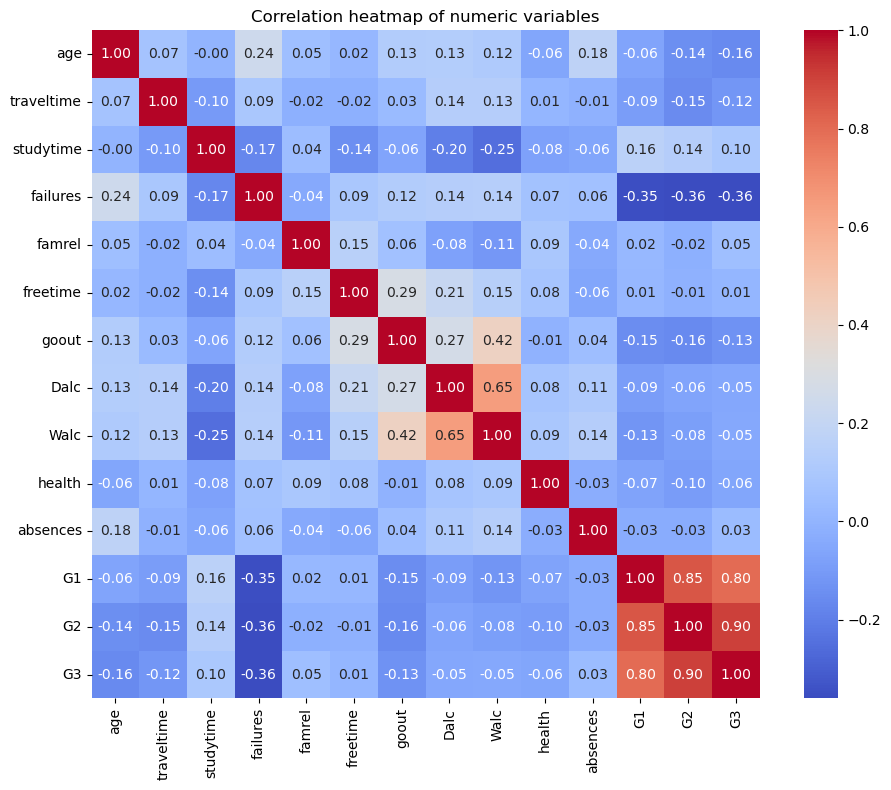

In [20]:
# 4.3 Correlation heatmap for numeric variables
plt.figure(figsize=(10, 8))
corr = df4[num_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation heatmap of numeric variables")
plt.tight_layout()
plt.show()

***6. Multivariate and advanced plots***

***==============================
5. Multivariate / advanced plots
==============================***

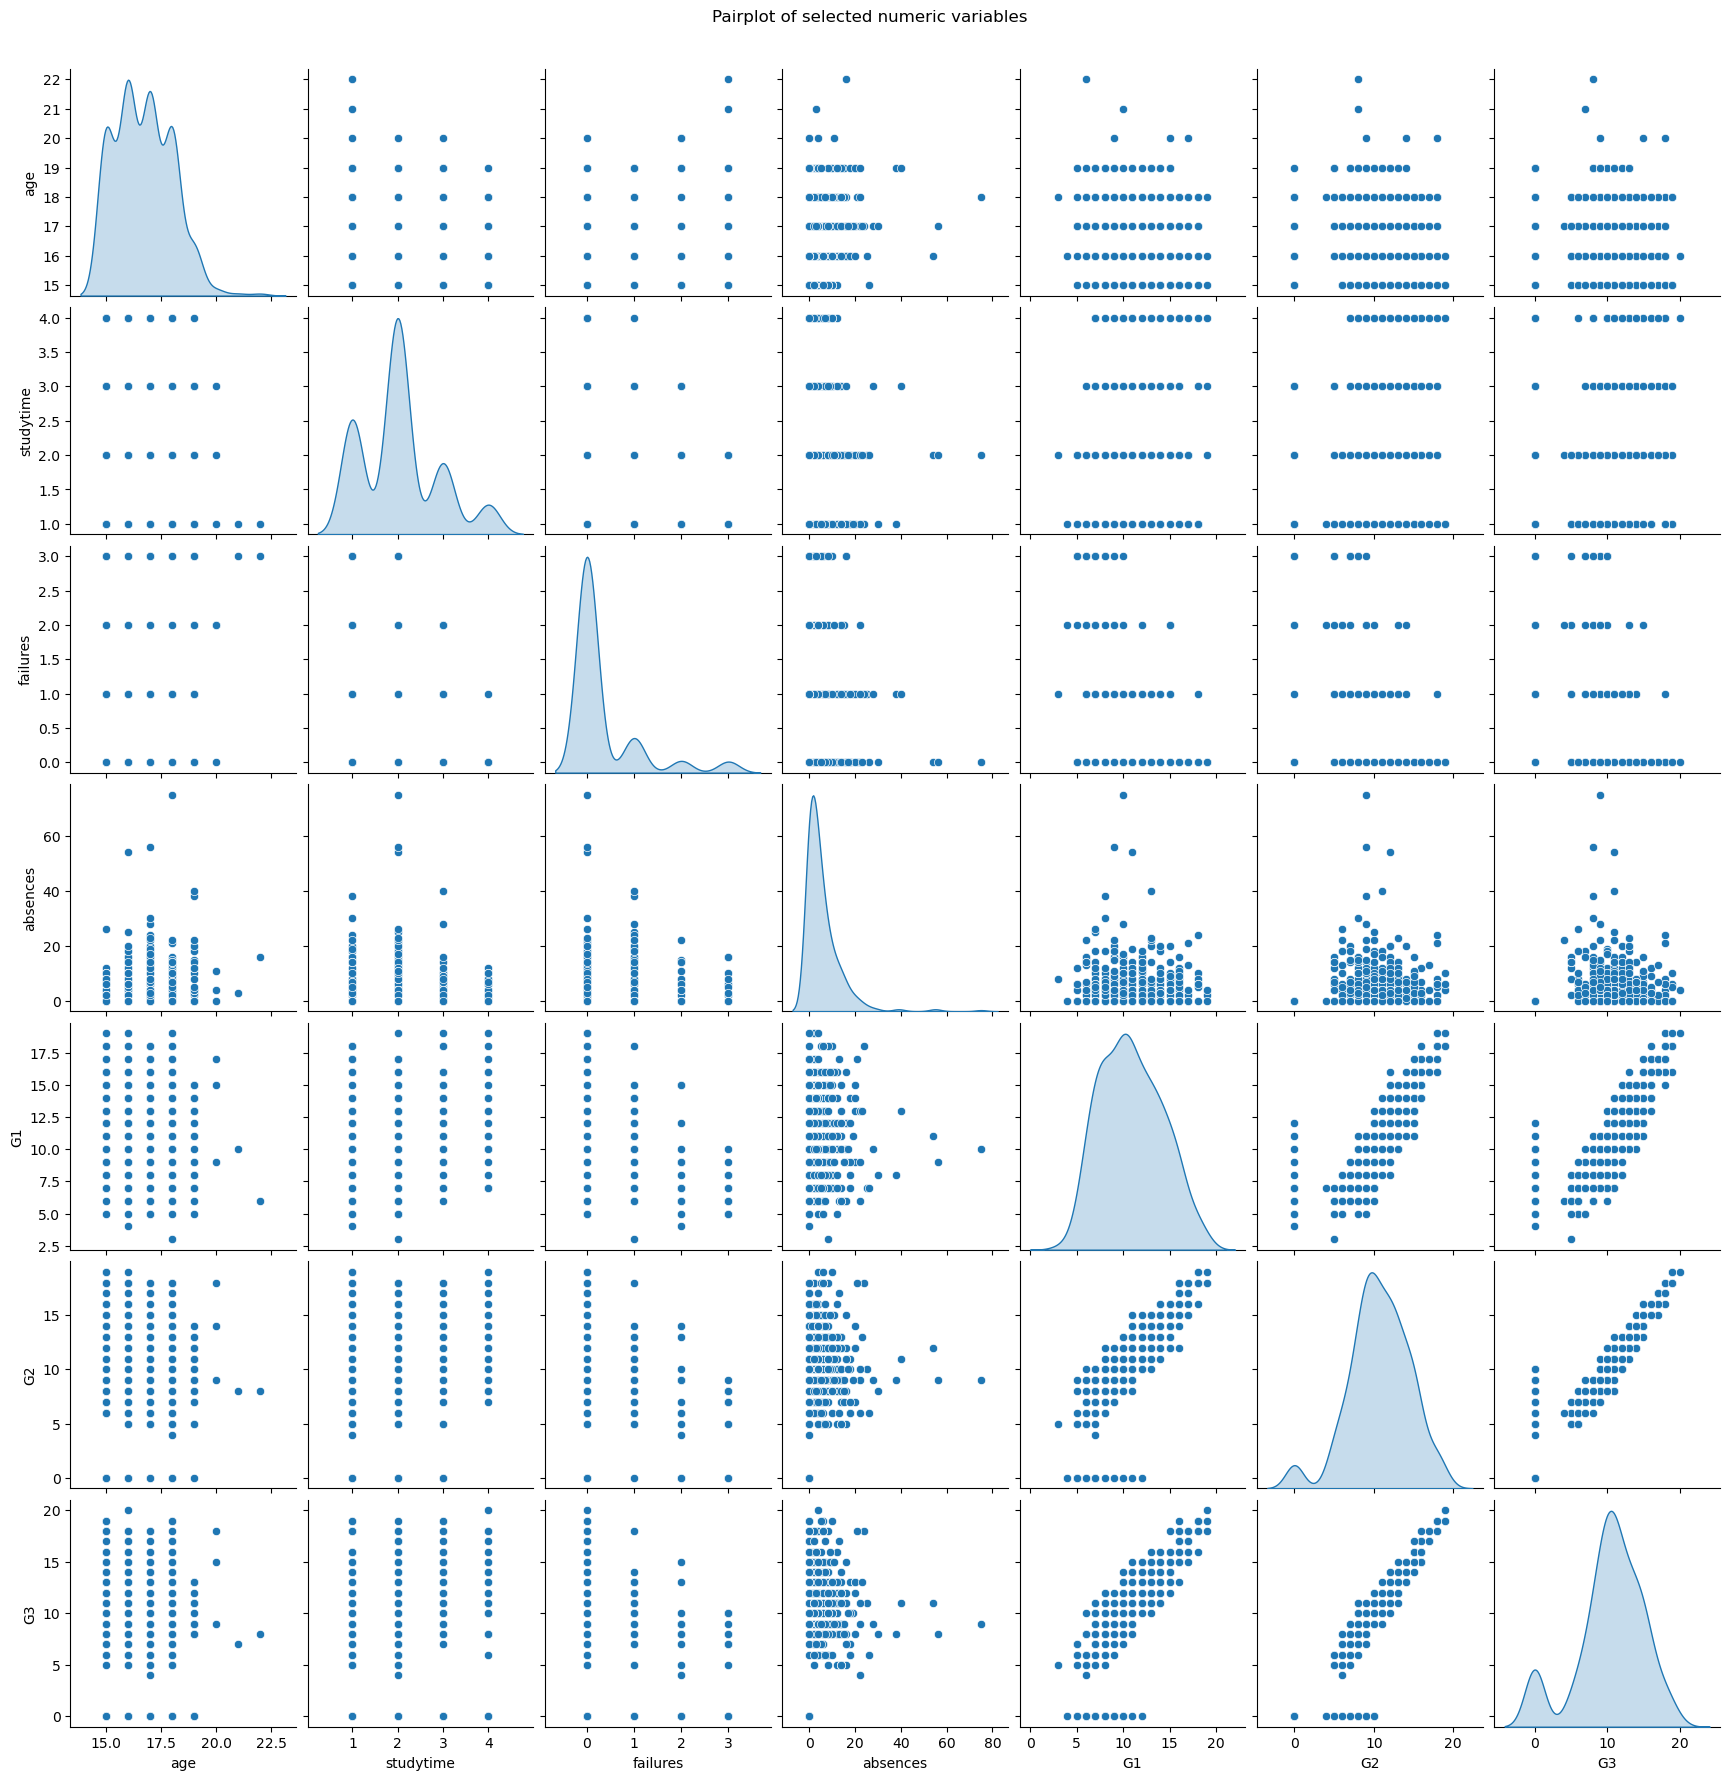

In [23]:
# 5.1 Pairplot of a subset of numeric variables
subset_cols = [c for c in ["age", "studytime", "failures", "absences", "G1", "G2", "G3"] if c in df4.columns]
sns.pairplot(df4[subset_cols], diag_kind="kde")
plt.suptitle("Pairplot of selected numeric variables", y=1.02)
plt.show()

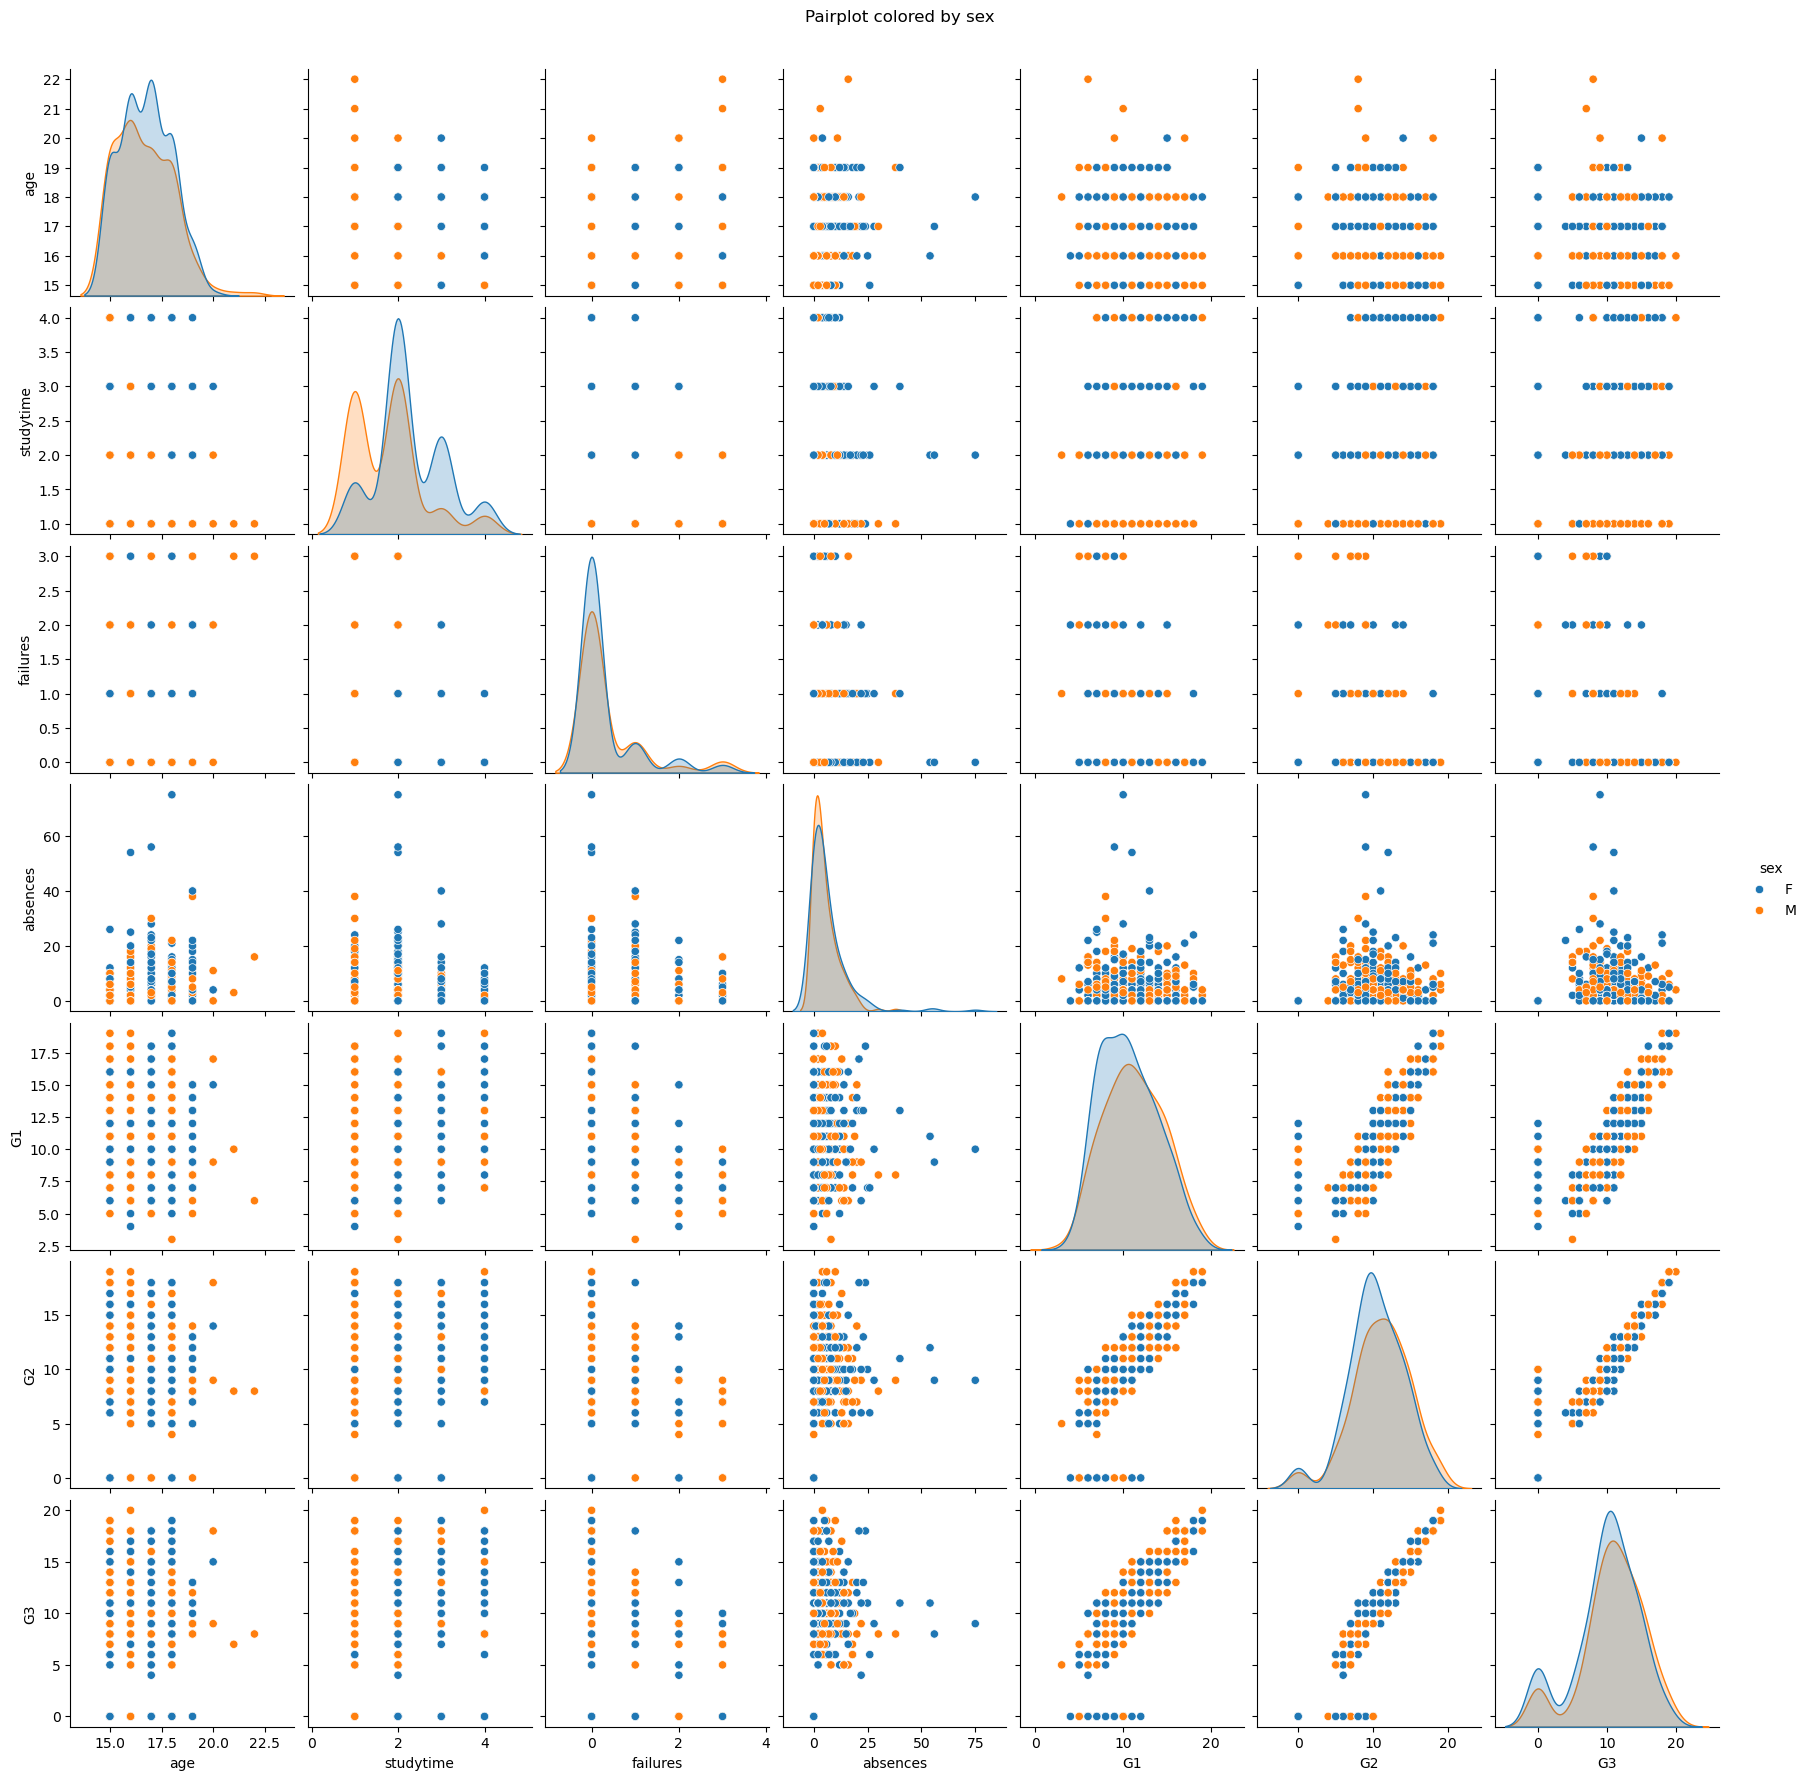

In [24]:
# 5.2 Pairplot with hue by sex (if present)
if "sex" in df4.columns:
    sns.pairplot(df4[subset_cols + ["sex"]], hue="sex", diag_kind="kde")
    plt.suptitle("Pairplot colored by sex", y=1.02)
    plt.show()

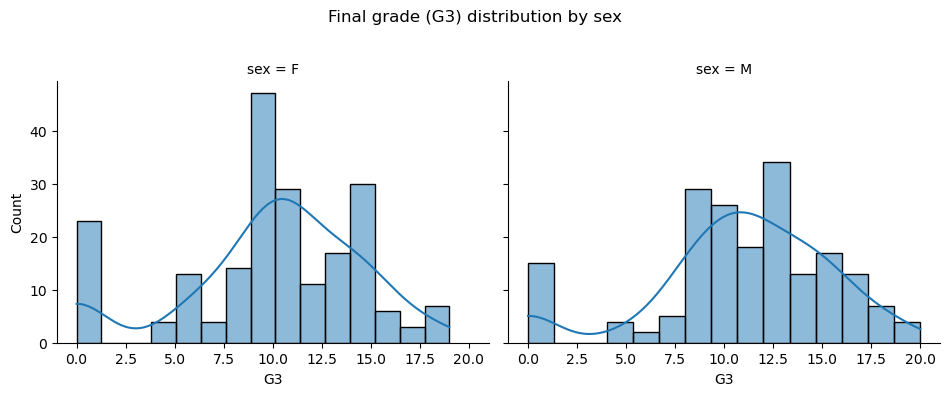

In [25]:
# 5.3 FacetGrid: distribution of G3 by sex
if "sex" in df4.columns:
    g = sns.FacetGrid(df4, col="sex", height=4, aspect=1.2)
    g.map(sns.histplot, target, bins=15, kde=True)
    g.fig.subplots_adjust(top=0.8)
    g.fig.suptitle("Final grade (G3) distribution by sex")
    plt.show()

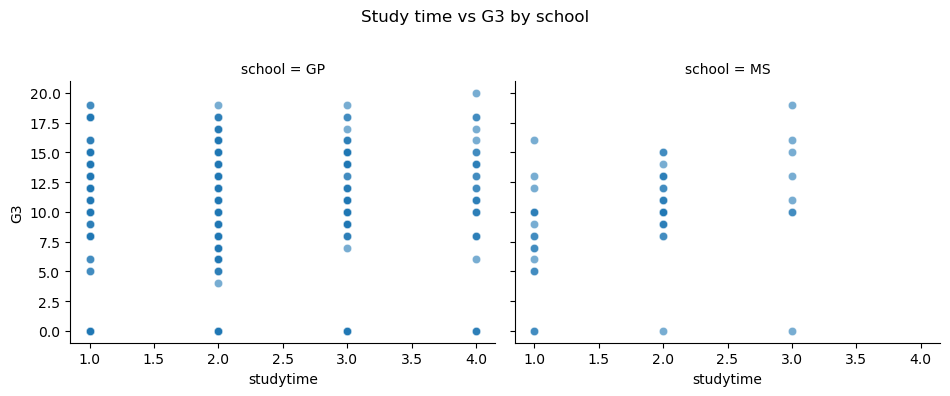

In [26]:
# 5.4 FacetGrid: studytime vs G3, by school
if "school" in df4.columns:
    g = sns.FacetGrid(df4, col="school", height=4, aspect=1.2)
    g.map_dataframe(sns.scatterplot, x="studytime", y=target, alpha=0.6)
    g.fig.subplots_adjust(top=0.8)
    g.fig.suptitle("Study time vs G3 by school")
    plt.show()